### Resultados dos testes com imagens sintéticas
- Segmentação em dado sintético usando heurística do paper de extração de fraturas e vugs (valor mínimo entre os dois picos do histograma)
- Segmentação em dados reais com threshold manual
- Composições de adjacências:
    - 1. Vertical direita 
    - 2. Vertical direita + vertical esquerda
    - 3. Horizontal
    - 4. Vertical direita + horizontal 
    - 5. 4 direções (Vertical + Horizontal + Diagonal Direita + Diagonal Esquerda)
    - 6. 3 direções (Horizontal + Diagonal Direita + Diagonal Esquerda)

In [1]:
from jupyterthemes import jtplot
jtplot.style()

import cv2
import numpy as np
from plot_utils import plot_result
from utils import get_segmentation_result
import matplotlib.pyplot as plt
# %matplotlib notebook

#obs: para escolher um threshold manualmente, incluir o parâmetro 't=X' em get_segmentation_result
#obs2: para desativar escala log, incluir o parâmetro 'log=False' em plot_result

#### Imagem de entrada 1
- Fraturas com abertura entre [3,8] pixels
- Diametros dos vugs entre [14,40] pixels
- 15% de ruído

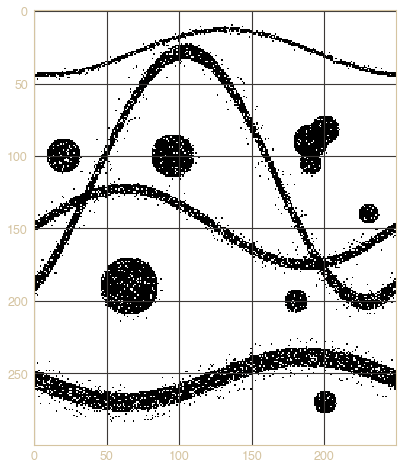

In [2]:
image = cv2.imread("./images/synth_2.tif", cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(8,8))
plt.imshow(image,cmap=plt.cm.get_cmap('binary'))
plt.show()

#### 1. Vertical direita
<img src="./images/fracture_right.png" width="180" style="float: left;">

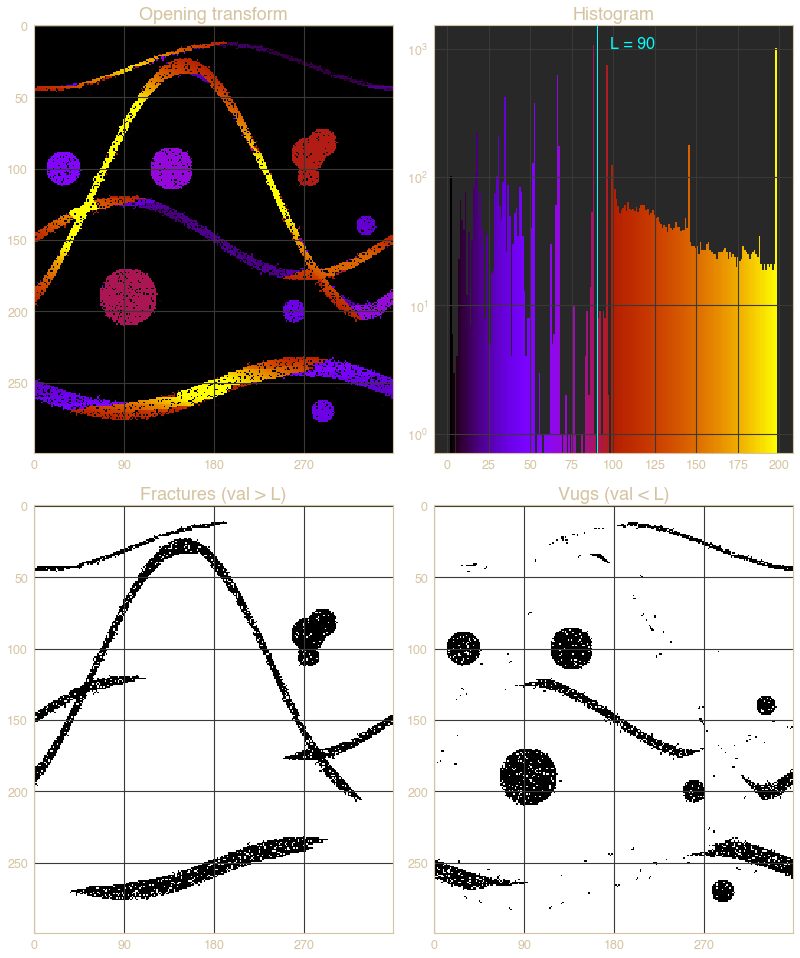

In [3]:
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_2_frac_r.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

#### 2. Relação vertical direita + vertical esquerda
<img src="./images/fracture_left.png" width="180" style="float: left;">
<img src="./images/fracture_right.png" width="180" style="float: left;">

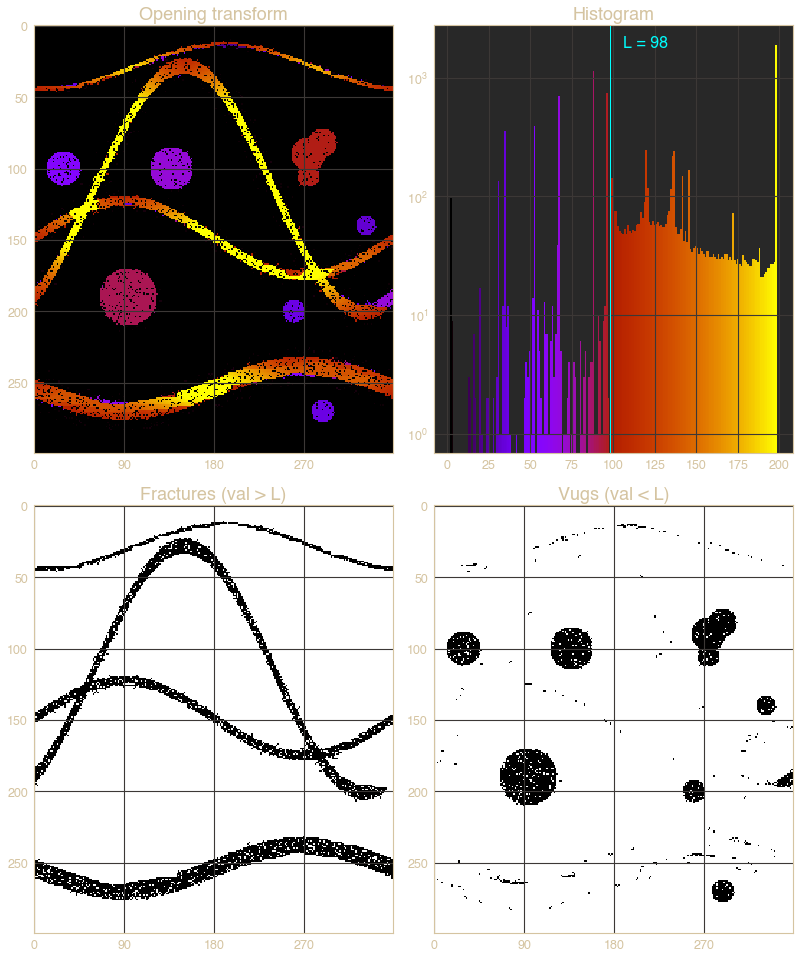

In [4]:
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_2_frac_lr.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

#### 3. Horizontal
<img src="./images/horizontal.png" width="180" style="float: left;">

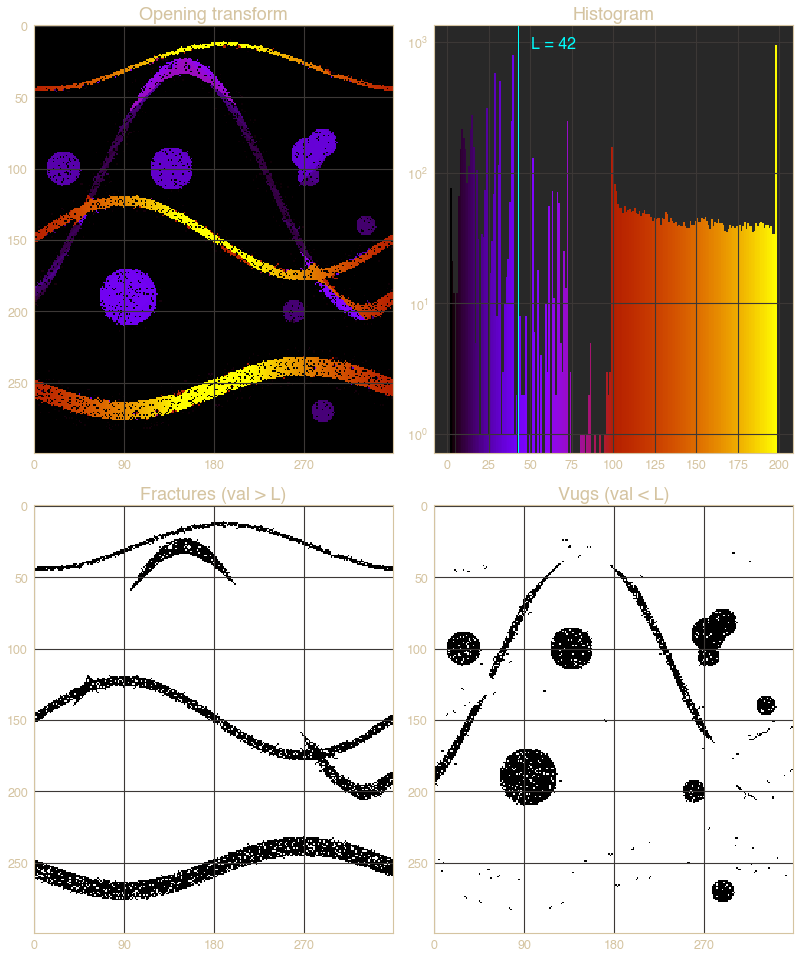

In [5]:
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_2_horiz.tif") #,t=80
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

#### 4. Horizontal + vertical direita
<img src="./images/horizontal.png" width="180" style="float: left;">
<img src="./images/fracture_right.png" width="180" style="float: left;">

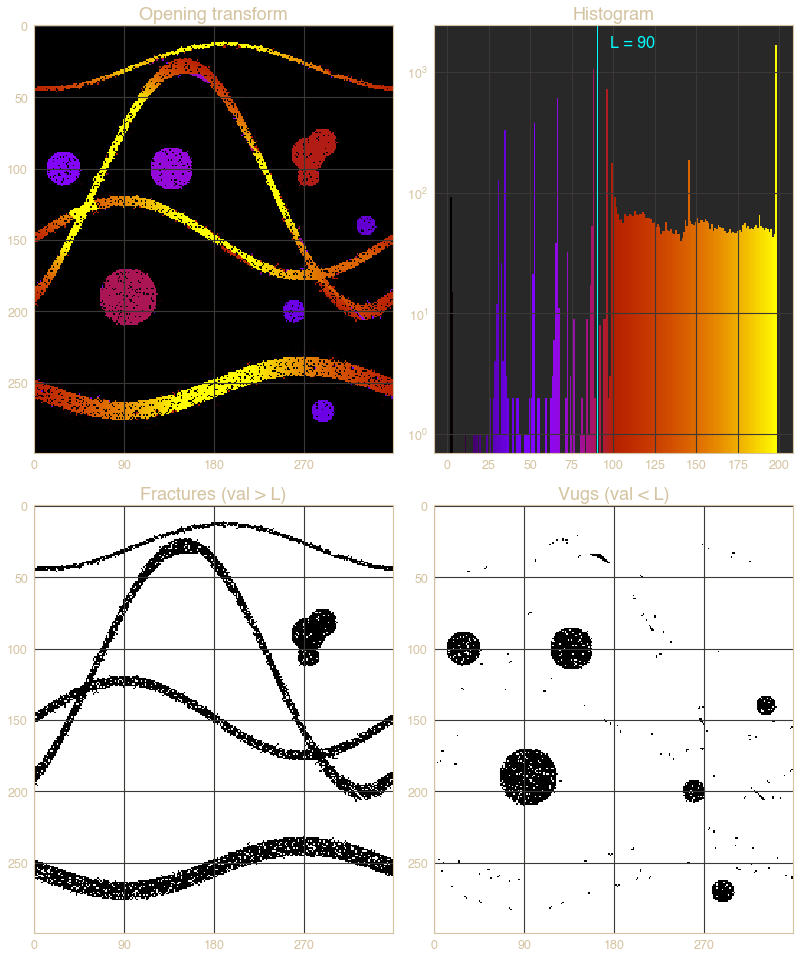

In [6]:
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_2_frac_r_horiz.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

#### 5.  4 direções originais do paper do H. Talbot e B. Appleton
<img src="./images/horizontal.png" width="180" style="float: left;"/>
<img src="./images/diagonal_left.png" width="180" style="float: left;"/>
<img src="./images/vertical.png" width="180" style="float: left;"/>
<img src="./images/diagonal_right.png" width="180" style="float: left;"/>

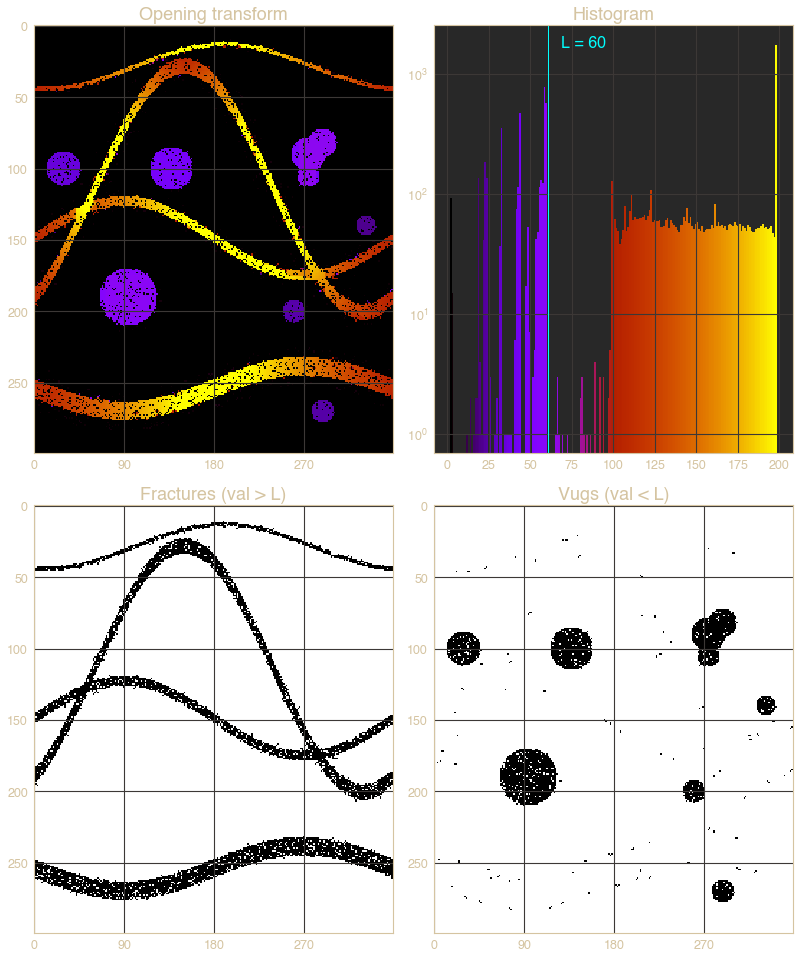

In [7]:
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_2_4_directions.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

#### 5.  3 direções (diagonais + horizontal)
<img src="./images/horizontal.png" width="180" style="float: left;"/>
<img src="./images/diagonal_left.png" width="180" style="float: left;"/>
<img src="./images/diagonal_right.png" width="180" style="float: left;"/>

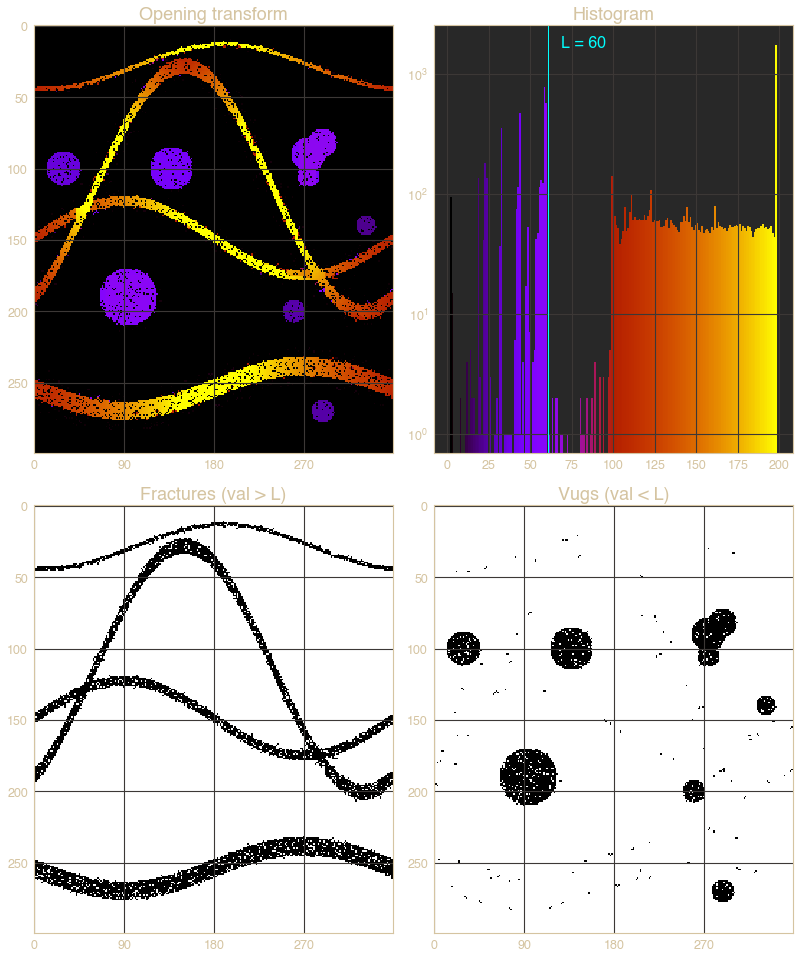

In [8]:
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_2_3_directions.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

#### Imagem de entrada 2
- Similar à fig. 9 do paper 
- Largura 250 amostras
- 4 fraturas com abertura entre [4,8] amostras
- 7 vugs com diâmetros entre [12,35] amostras (2x12, 4x20, 1x35)
- Ruído ~10%

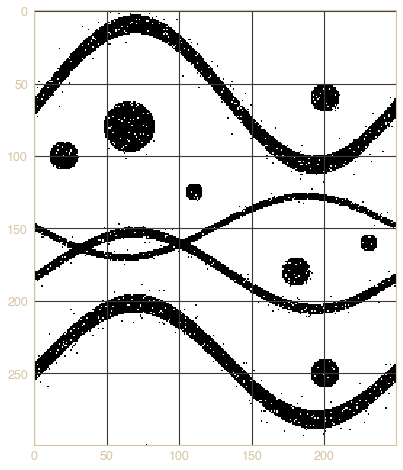

In [9]:
image = cv2.imread("./images/synth_1.tif", cv2.IMREAD_GRAYSCALE)
fig = plt.figure(figsize=(8,8))
plt.imshow(image,cmap=plt.cm.get_cmap('binary'))
plt.show()

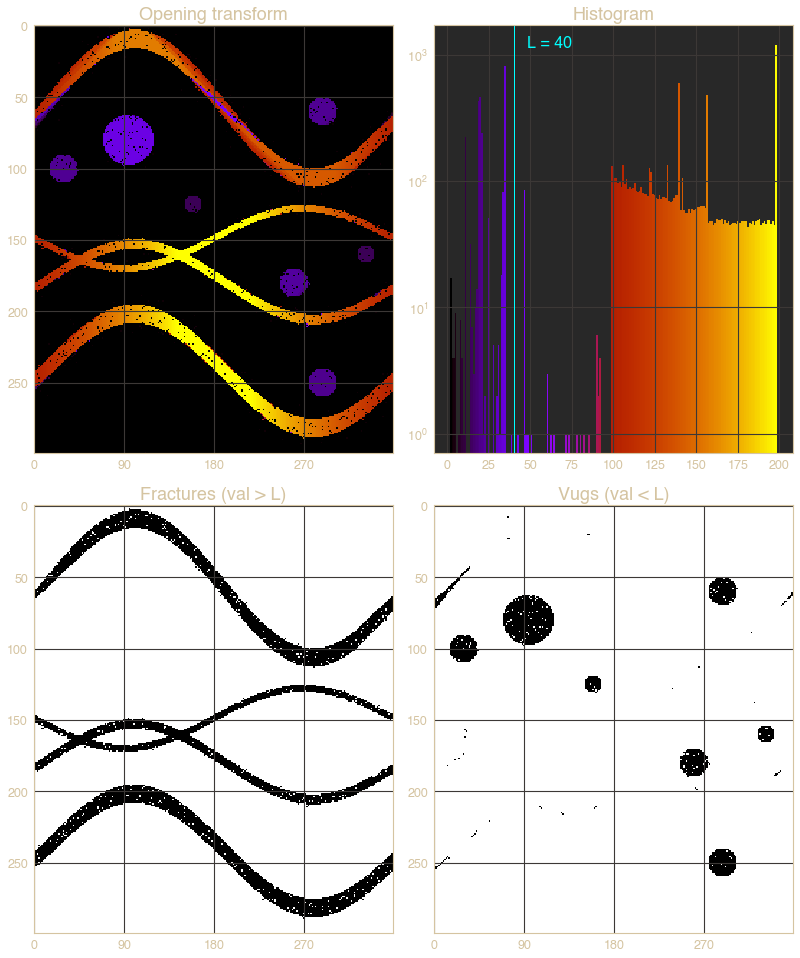

In [10]:
# 1. Tentativa de reprodução do resultado da fig. 9 do paper 
# usando relação horizontal e o threshold L = 40 para separar fraturas e vugs
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_1_horiz.tif", t=40)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

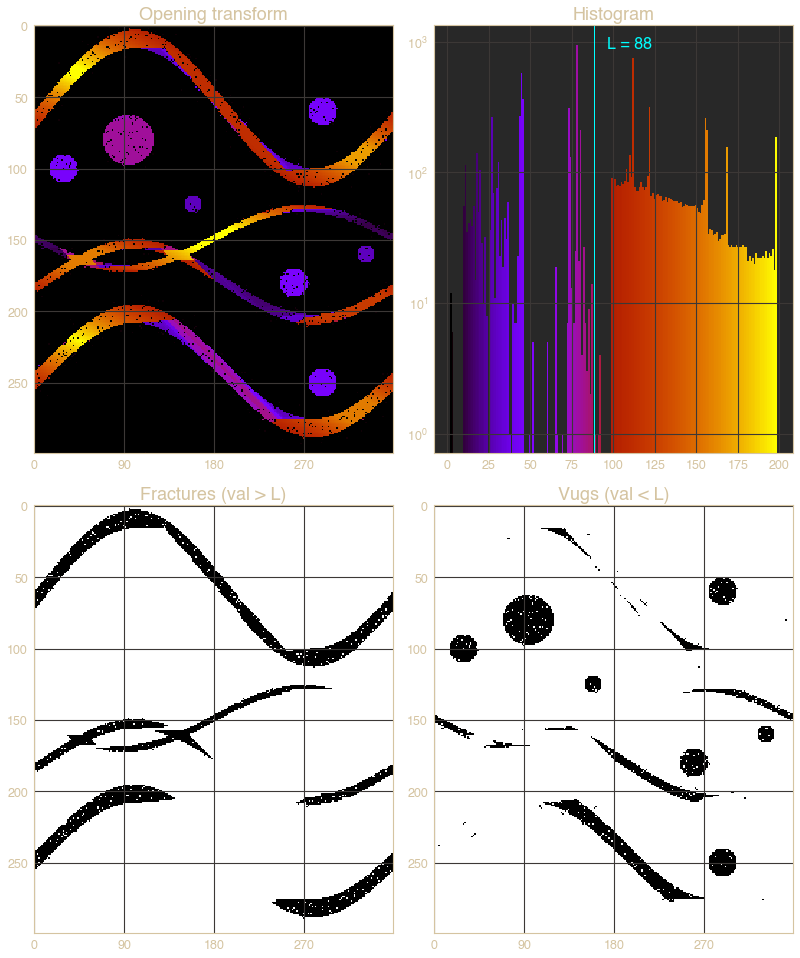

In [11]:
# 2. Vertical direita
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_1_frac_r.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

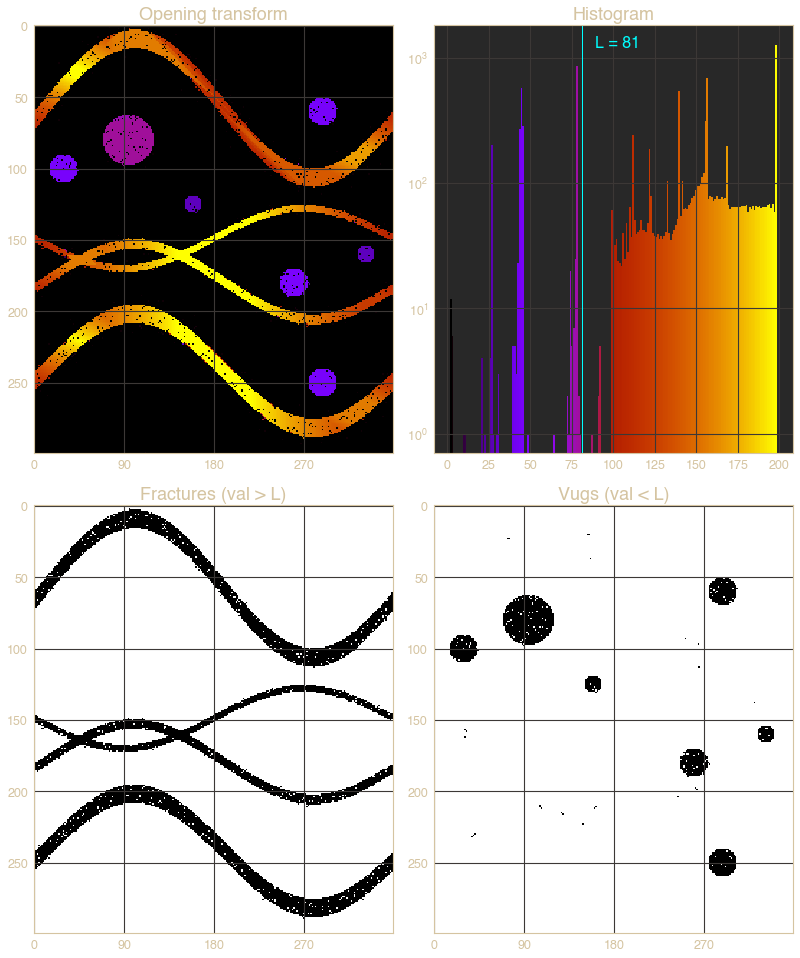

In [12]:
# 3. Horizontal + vertical direita
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_1_frac_r_horiz.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

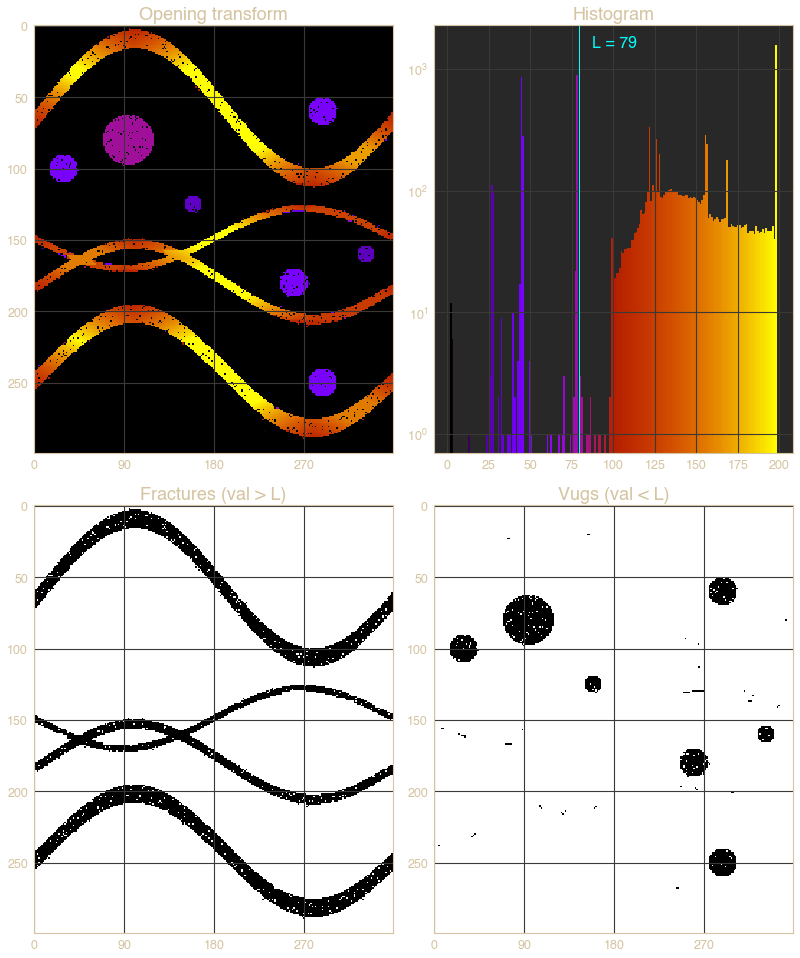

In [13]:
# 4. Vertical direita + vertical esquerda
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_1_frac_lr.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

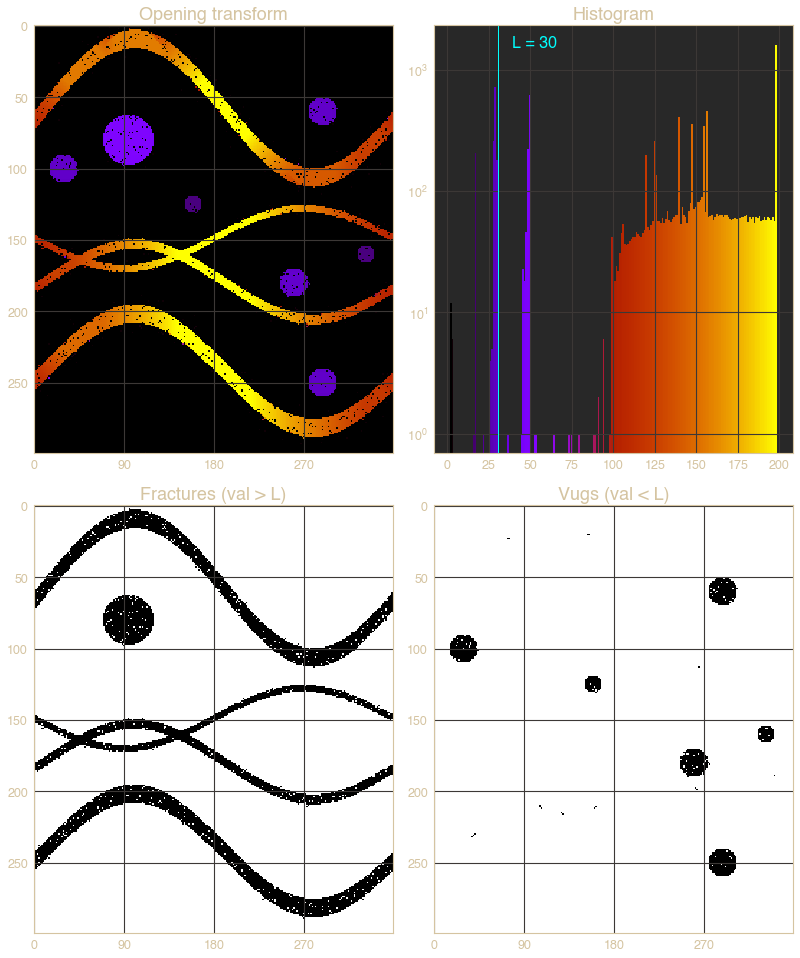

In [14]:
# 4.  4 direções originais do paper do H. Talbot e B. Appleton
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_1_4_directions.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

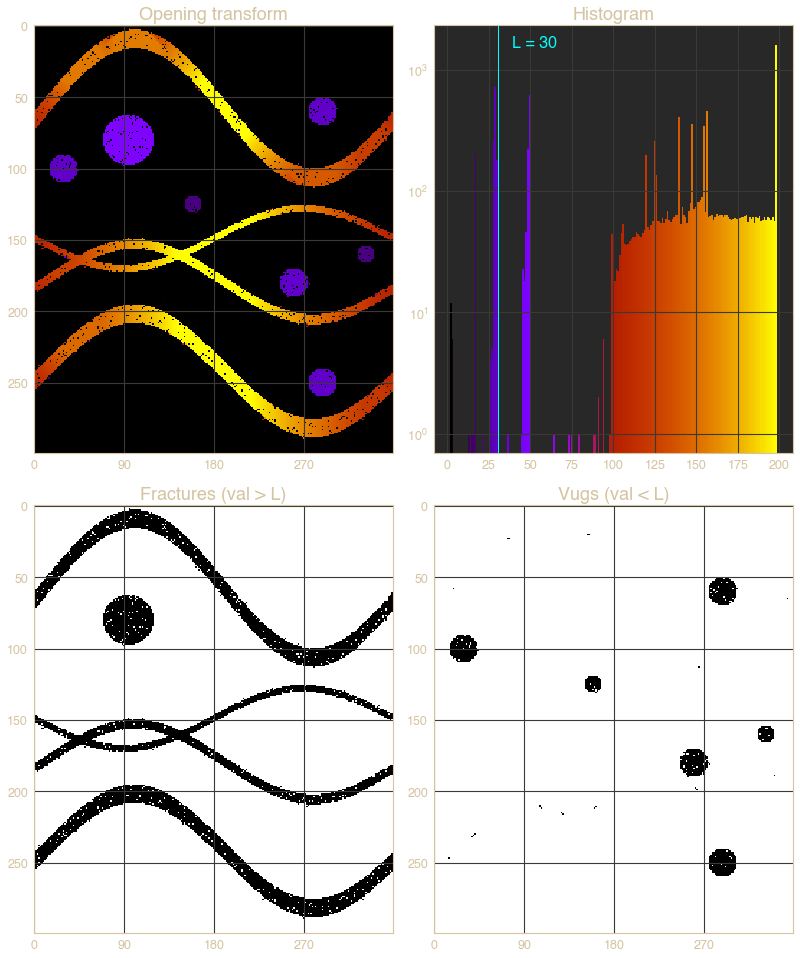

In [15]:
# 4.  3 direções (diagonais + horizontal)
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_synth_1_3_directions.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

### Dados reais do paper
- 1. Vertical direita 
- 2. Vertical direita + vertical esquerda
- 3. Horizontal
- 4. Vertical direita + horizontal 
- 5. 4 direções (Vertical + Horizontal + Diagonal Direita + Diagonal Esquerda)
- 6. 3 direções (Horizontal + Diagonal Direita + Diagonal Esquerda)

#### Fig. 15

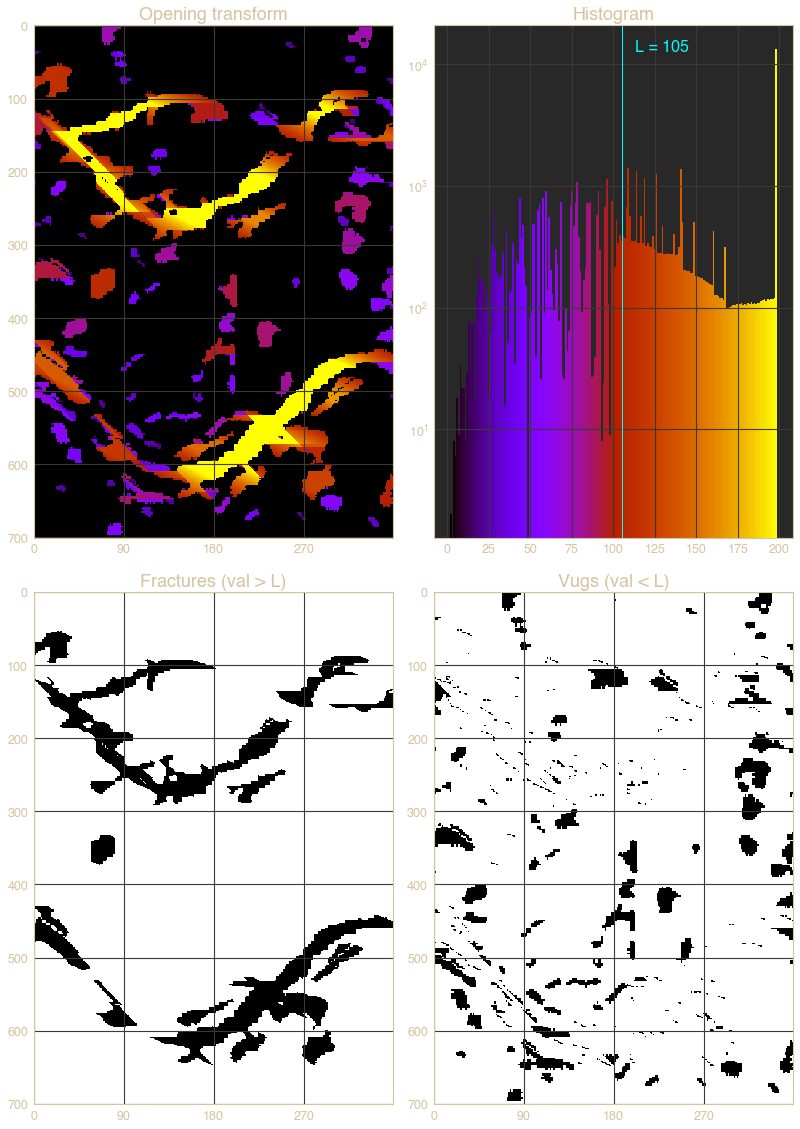

In [16]:
#1. Vertical direita
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig15_binary_frac_r.tif", t = 105)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

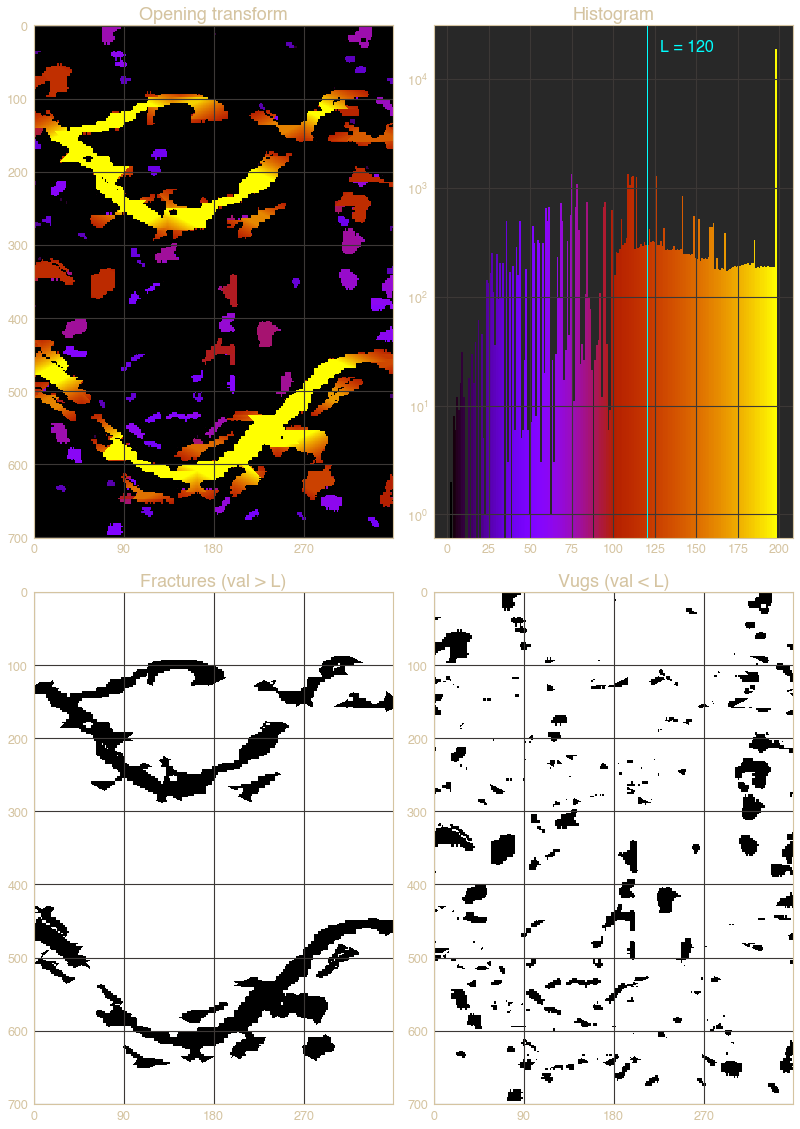

In [17]:
#2. Vertical direita + vertical esquerda
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig15_binary_frac_lr.tif", t = 120)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

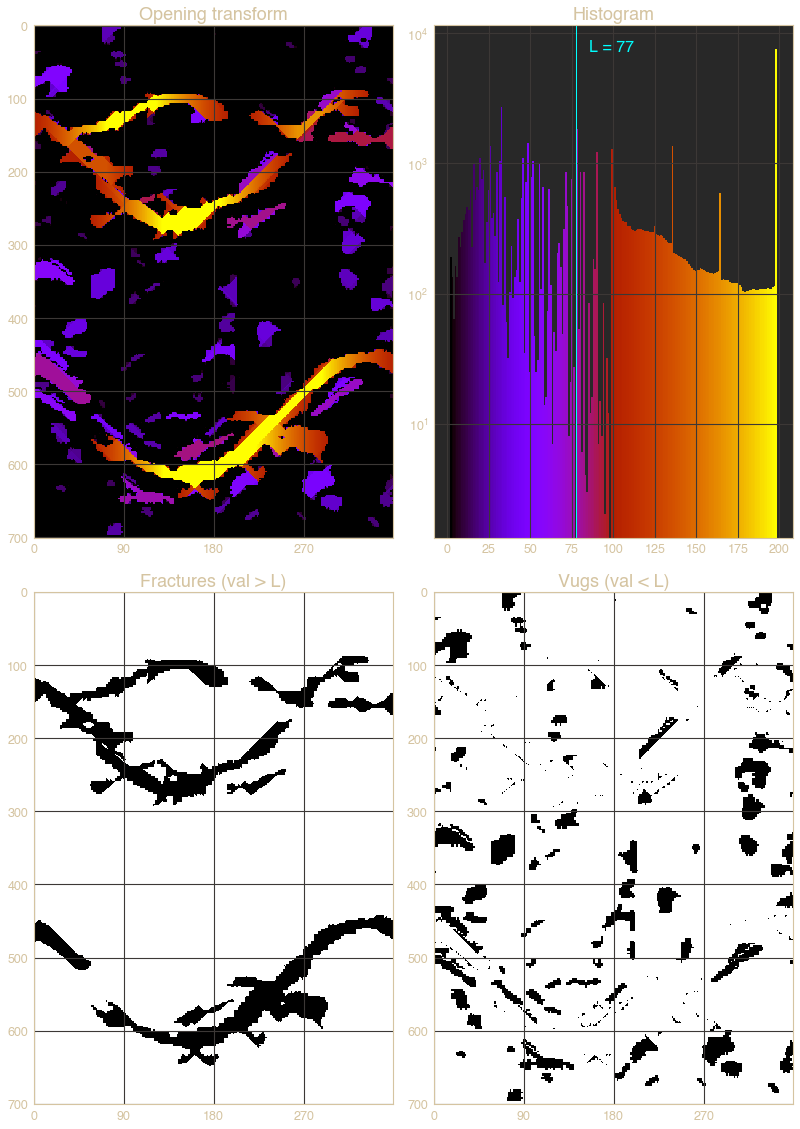

In [18]:
#3. Horizontal
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig15_binary_horiz.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

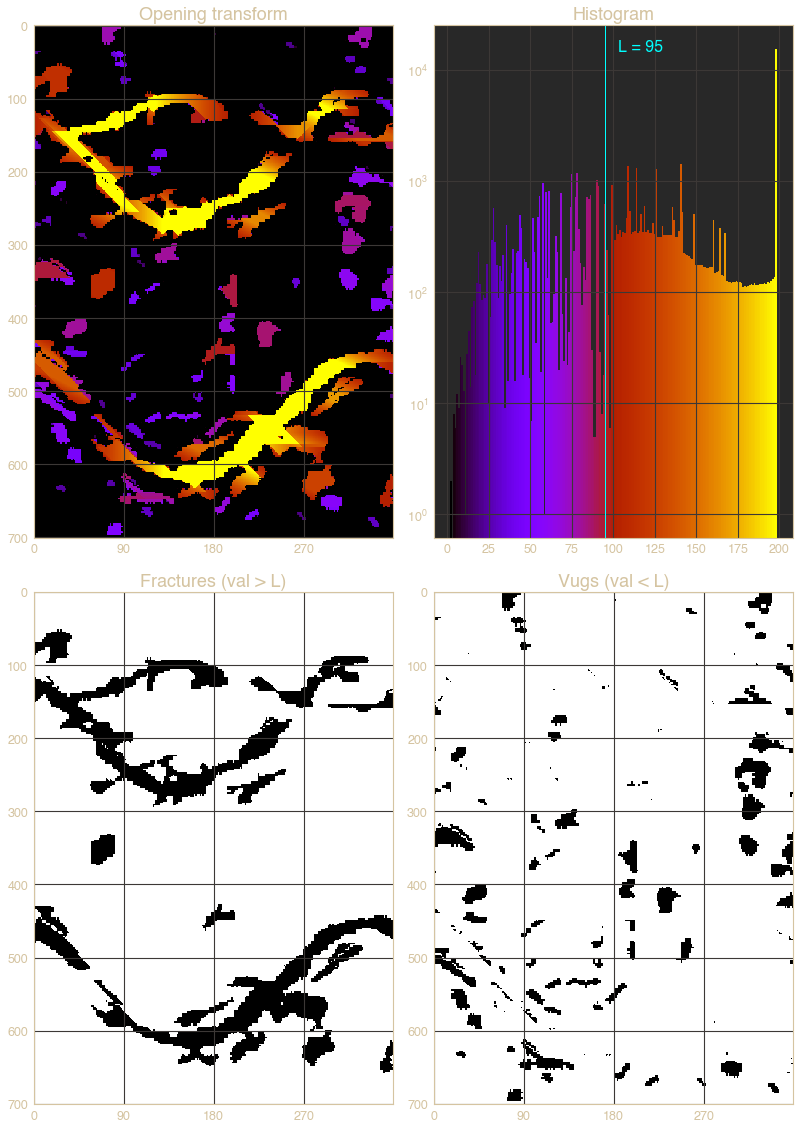

In [19]:
#4. Vertical direita + horizontal
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig15_binary_frac_r_horiz.tif", t=95)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

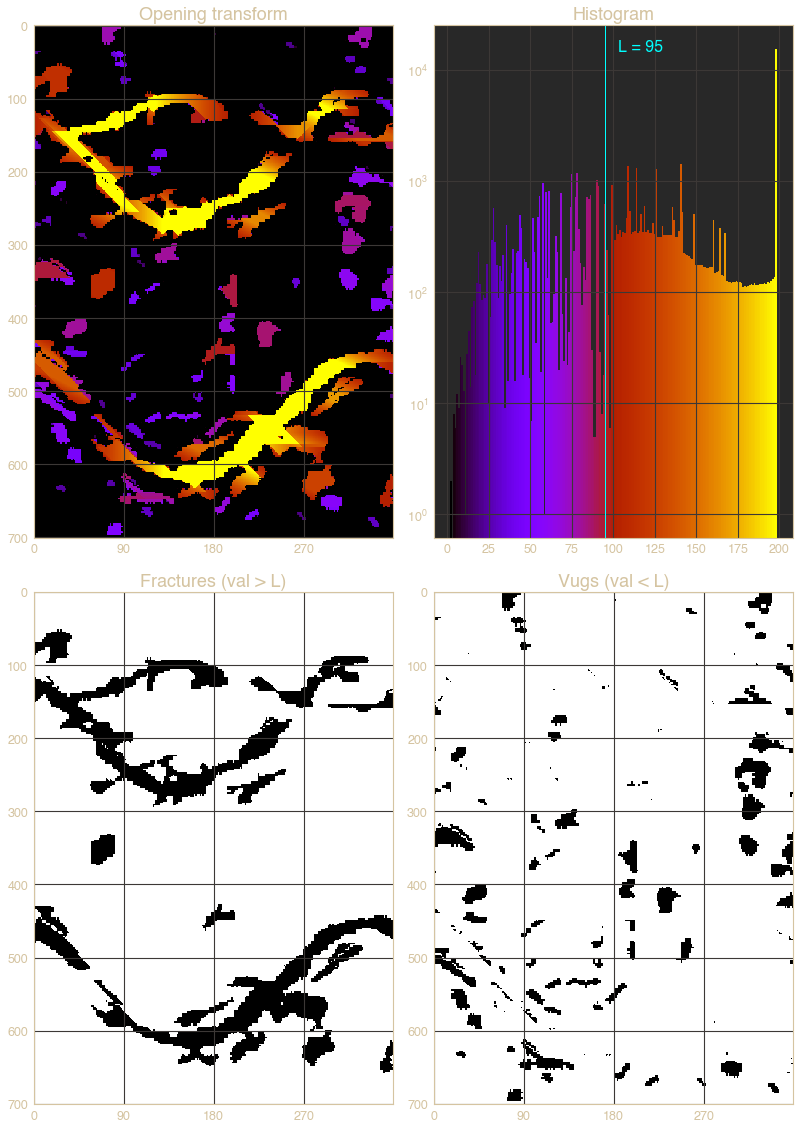

In [20]:
#5. 4 direções (Vertical + Horizontal + Diagonal Direita + Diagonal Esquerda)
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig15_binary_4_directions.tif", t=95)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

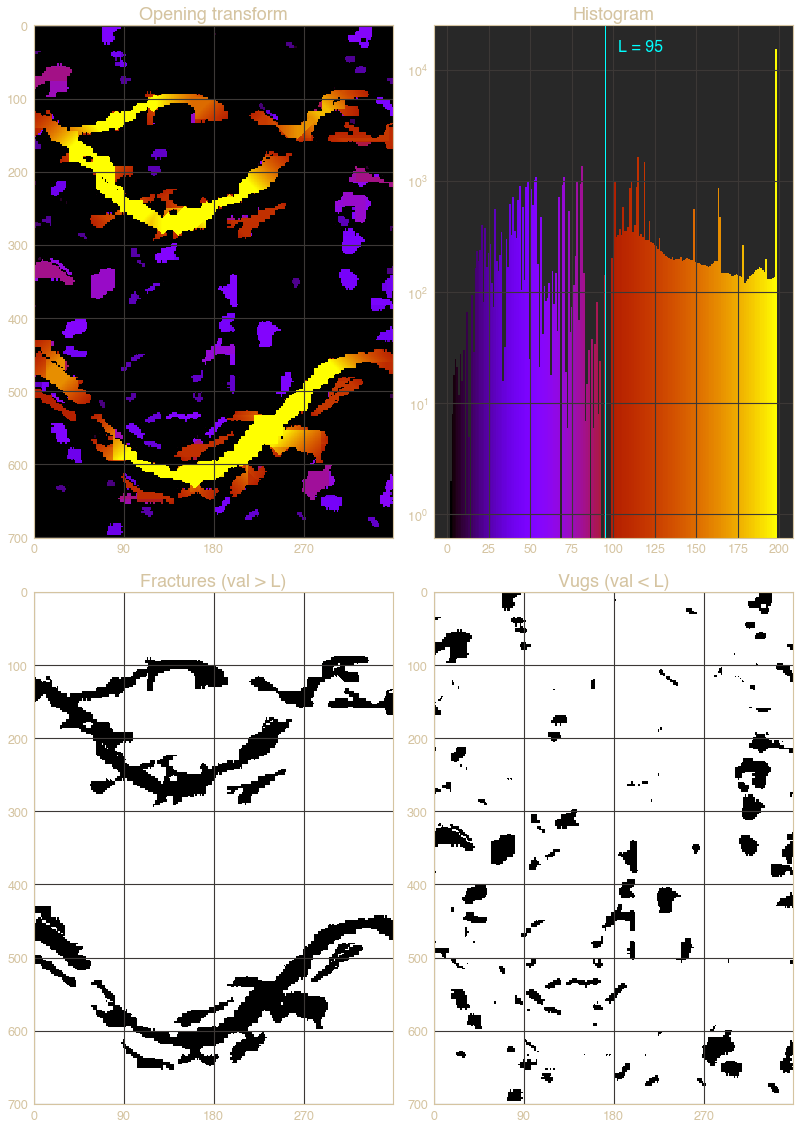

In [21]:
#6. 3 direções (Horizontal + Diagonal Direita + Diagonal Esquerda)
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig15_binary_3_directions.tif", t=95)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

#### Fig. 17

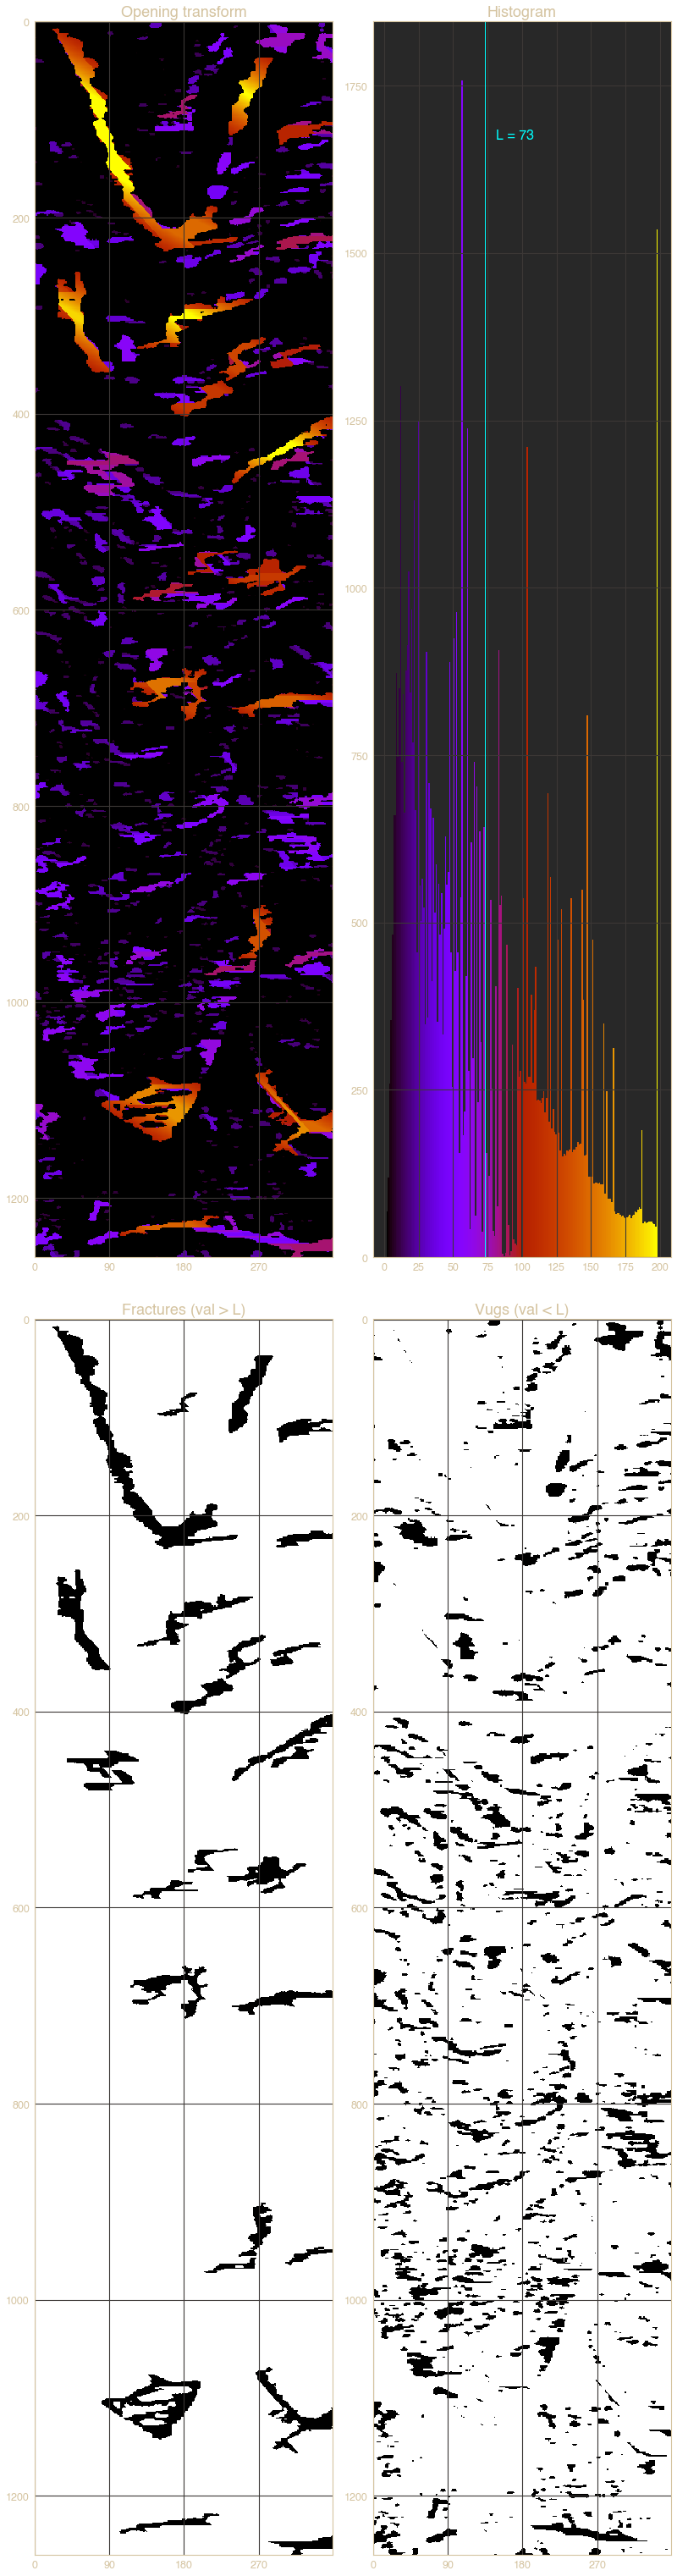

In [22]:
#1. Vertical direita
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig17_binary_frac_r.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1, log=False)

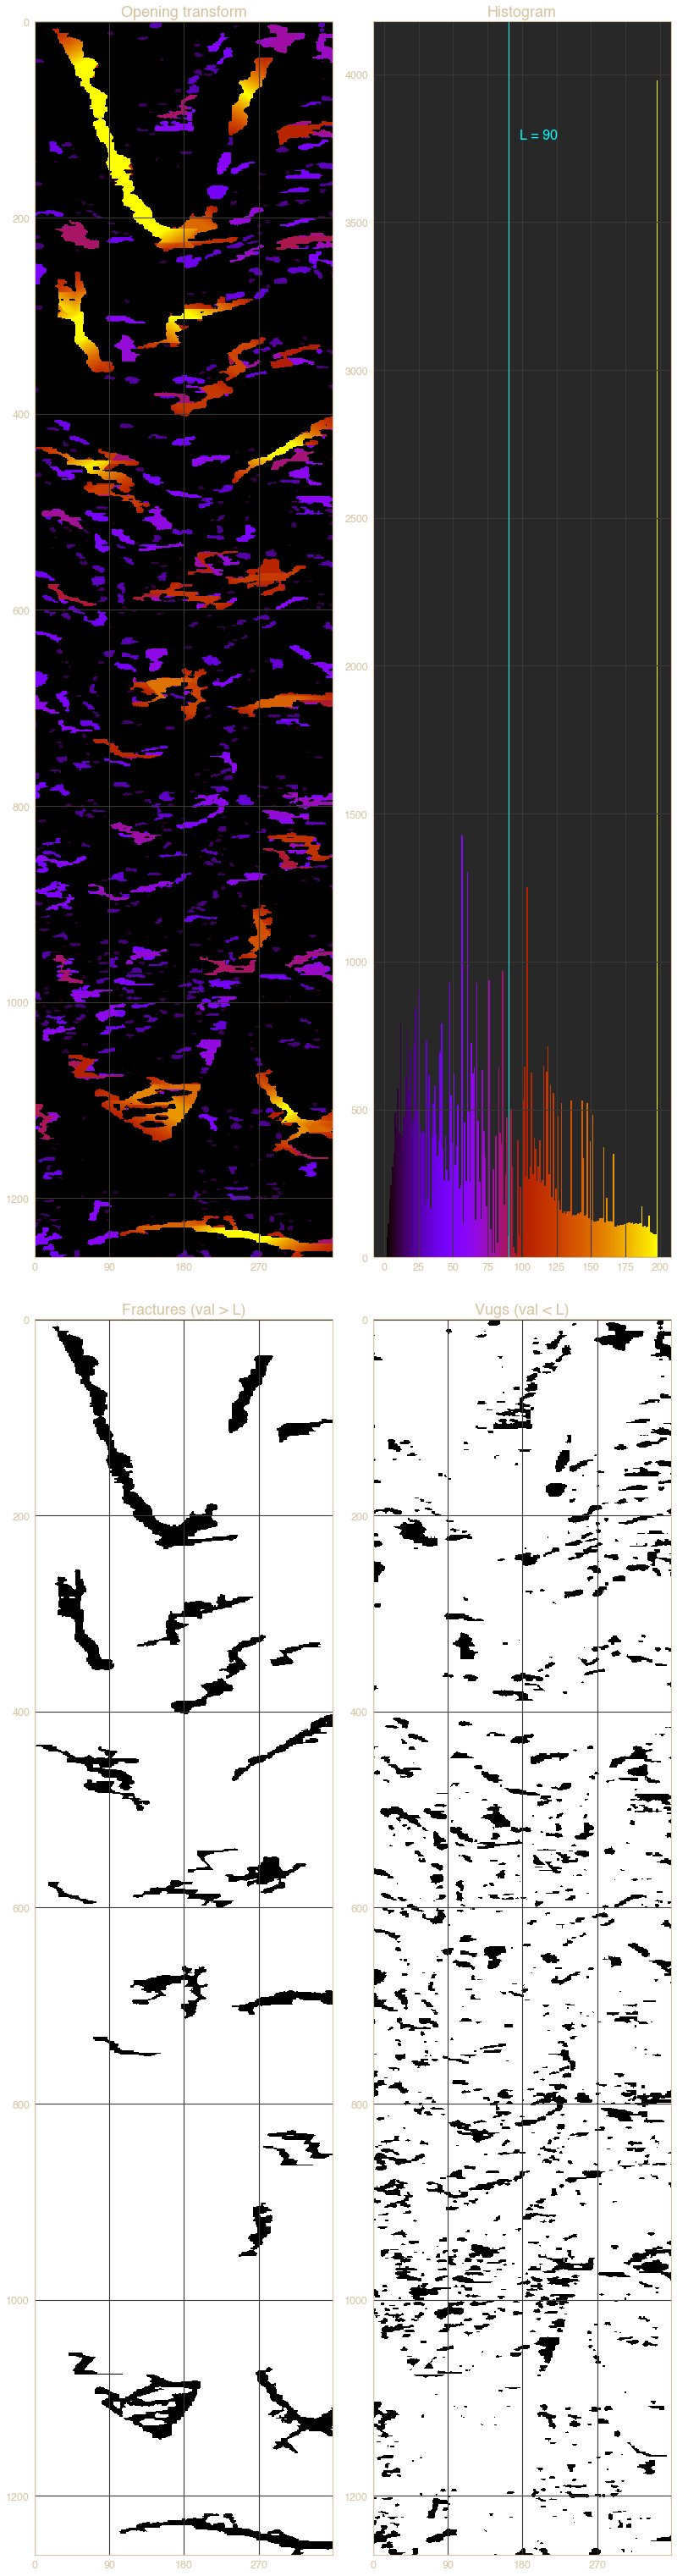

In [23]:
#2. Vertical direita + vertical esquerda
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig17_binary_frac_lr.tif", t=90)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1, log=False)

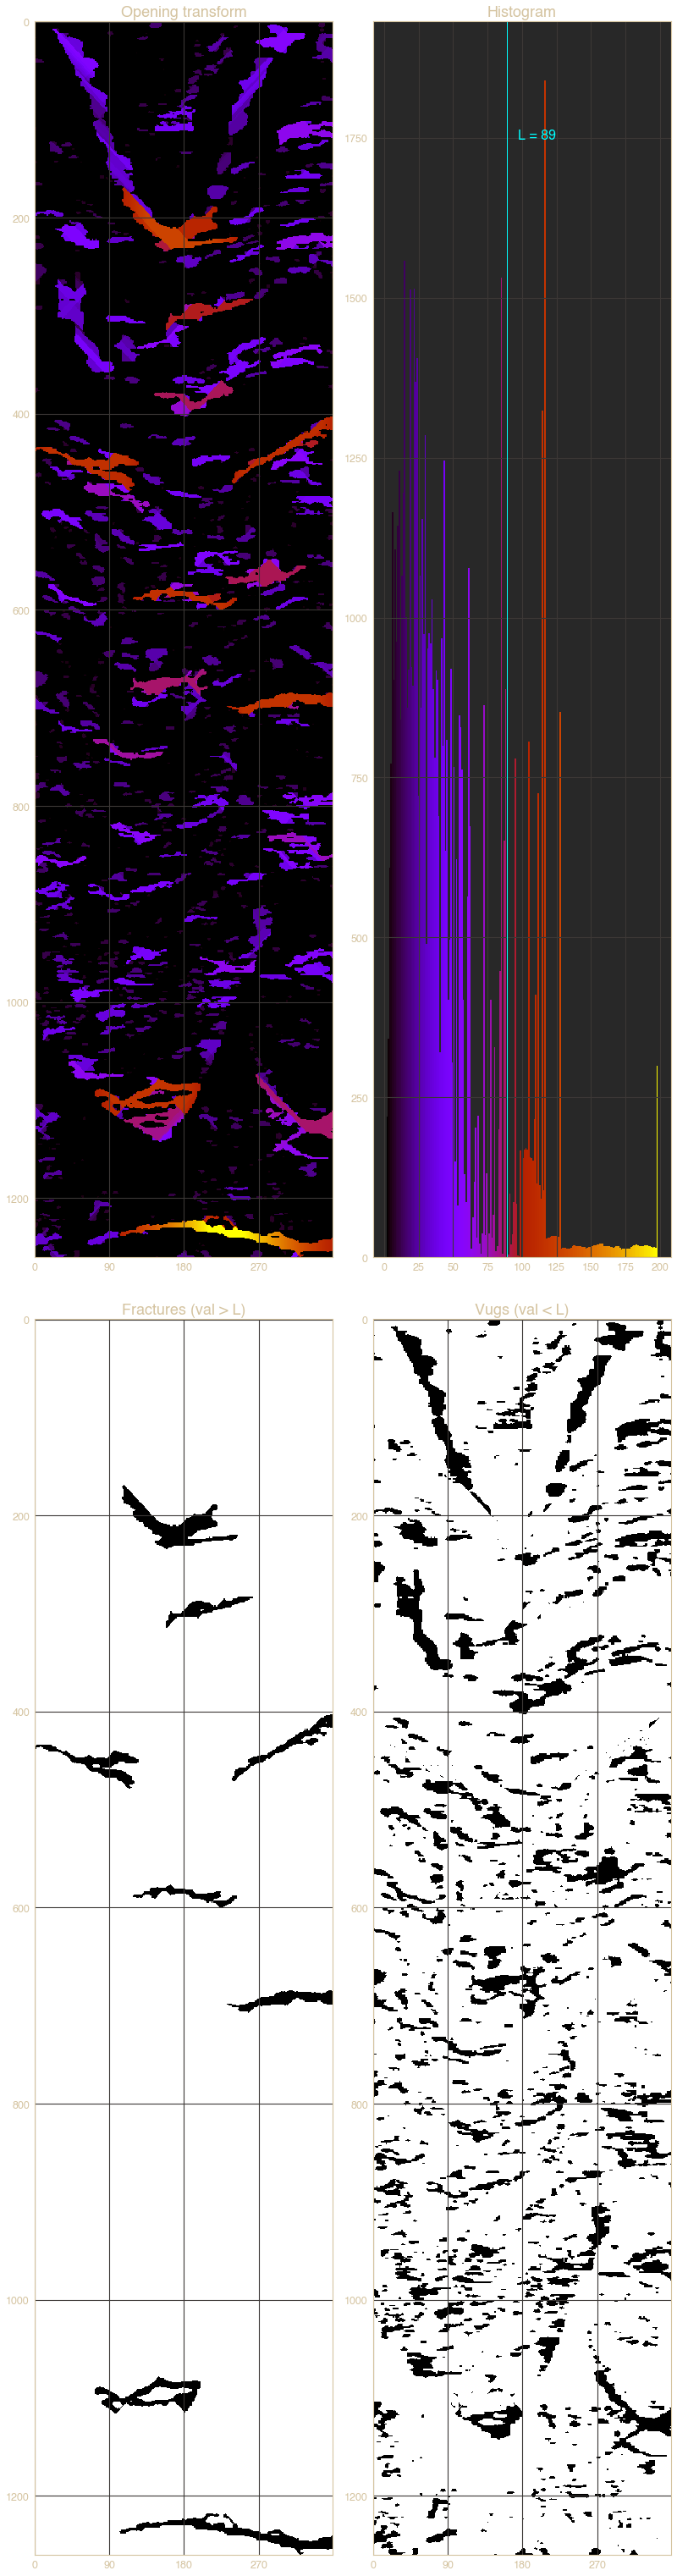

In [24]:
 #3. Horizontal
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig17_binary_horiz.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1, log=False)

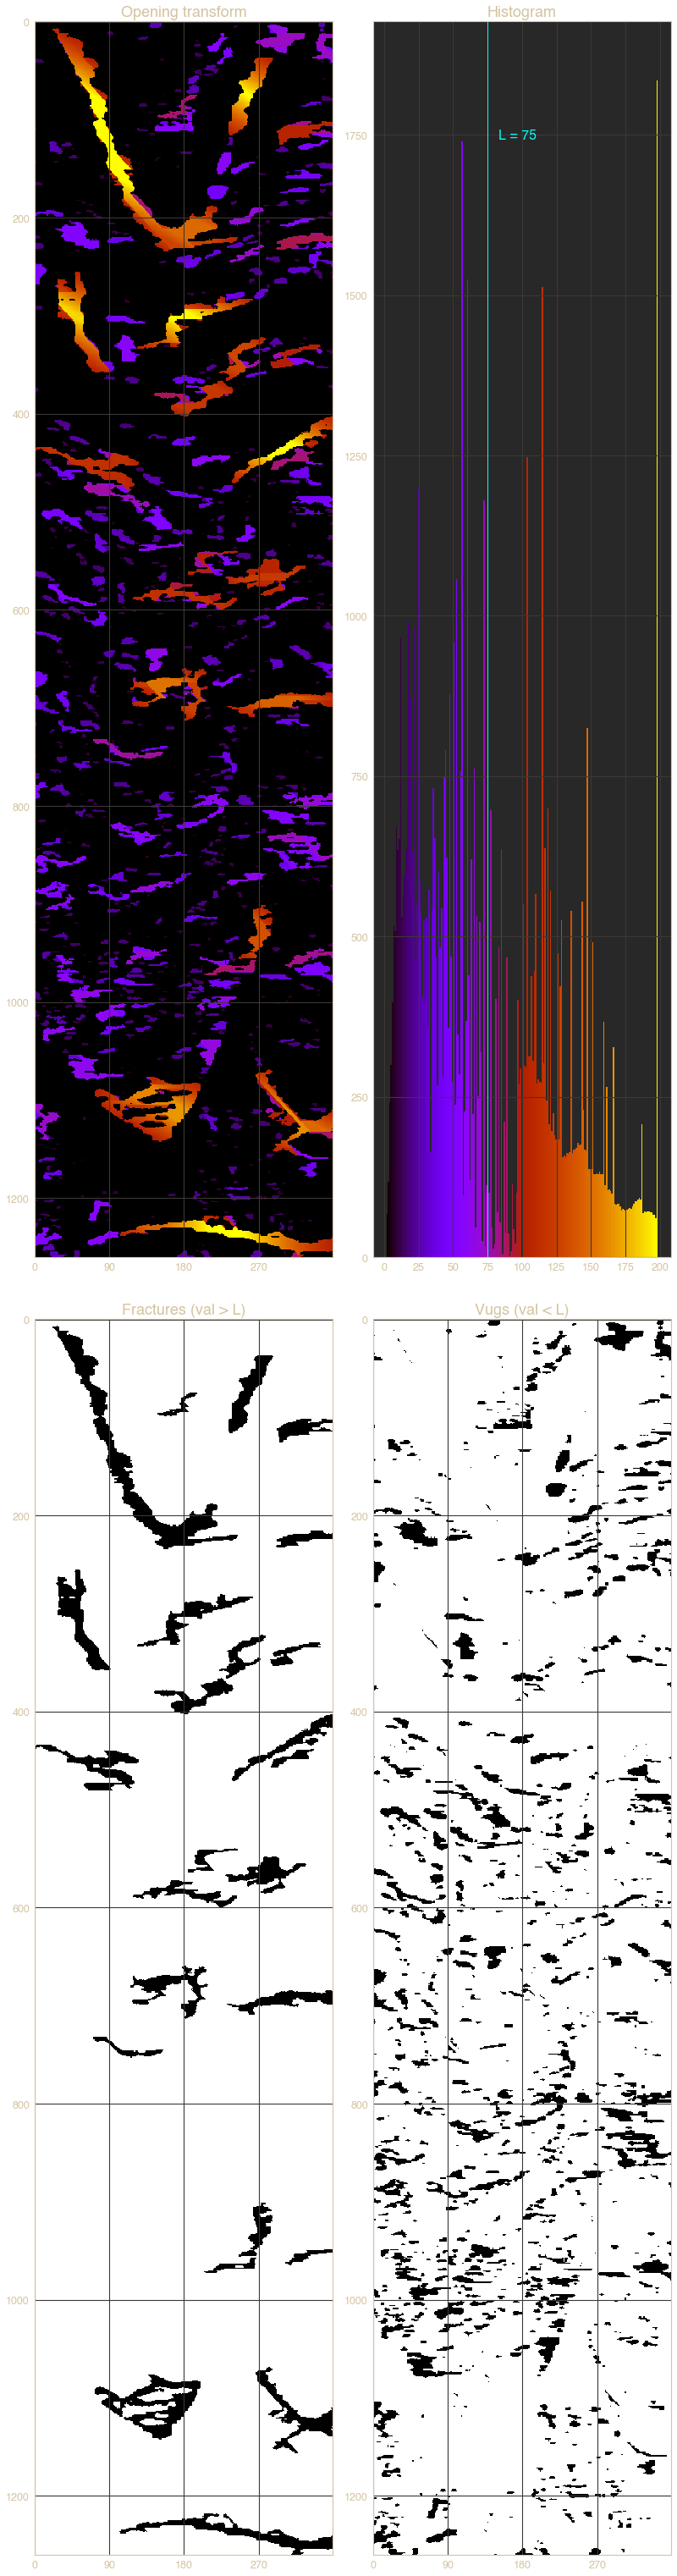

In [25]:
#4. Vertical direita + horizontal
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig17_binary_frac_r_horiz.tif", t=75)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1, log=False)

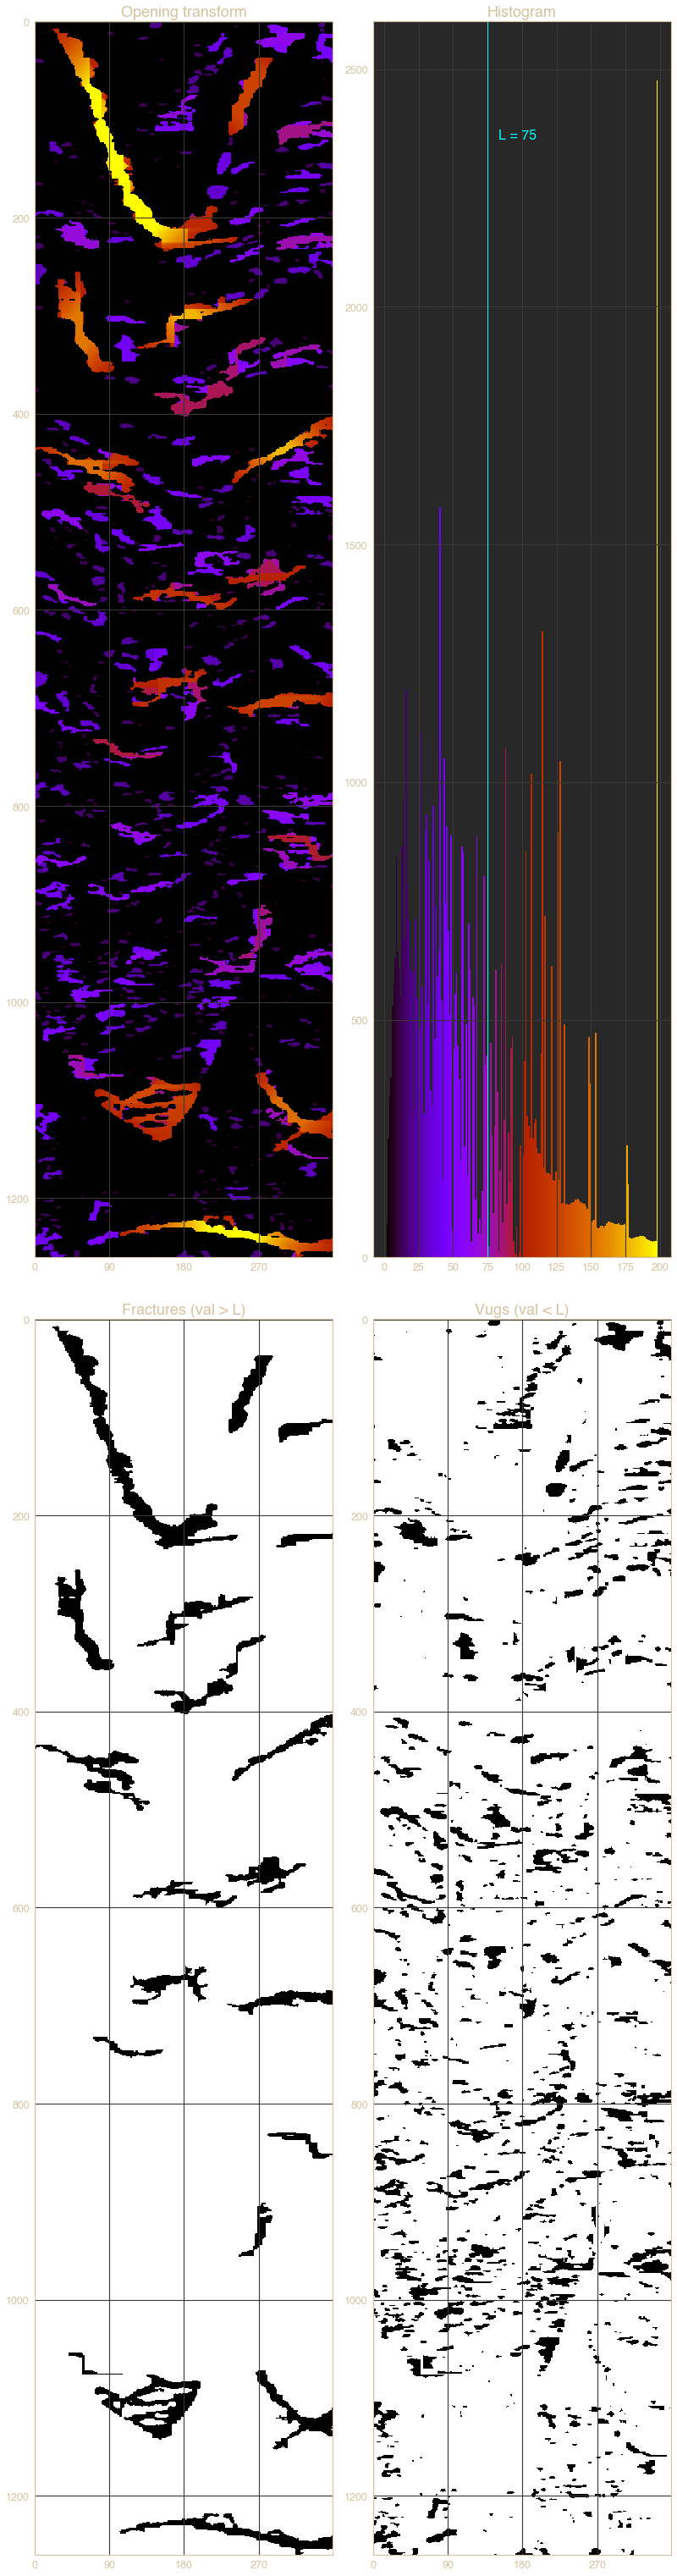

In [26]:
#5. 4 direções
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig17_binary_4_directions.tif", t=75)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1, log=False)

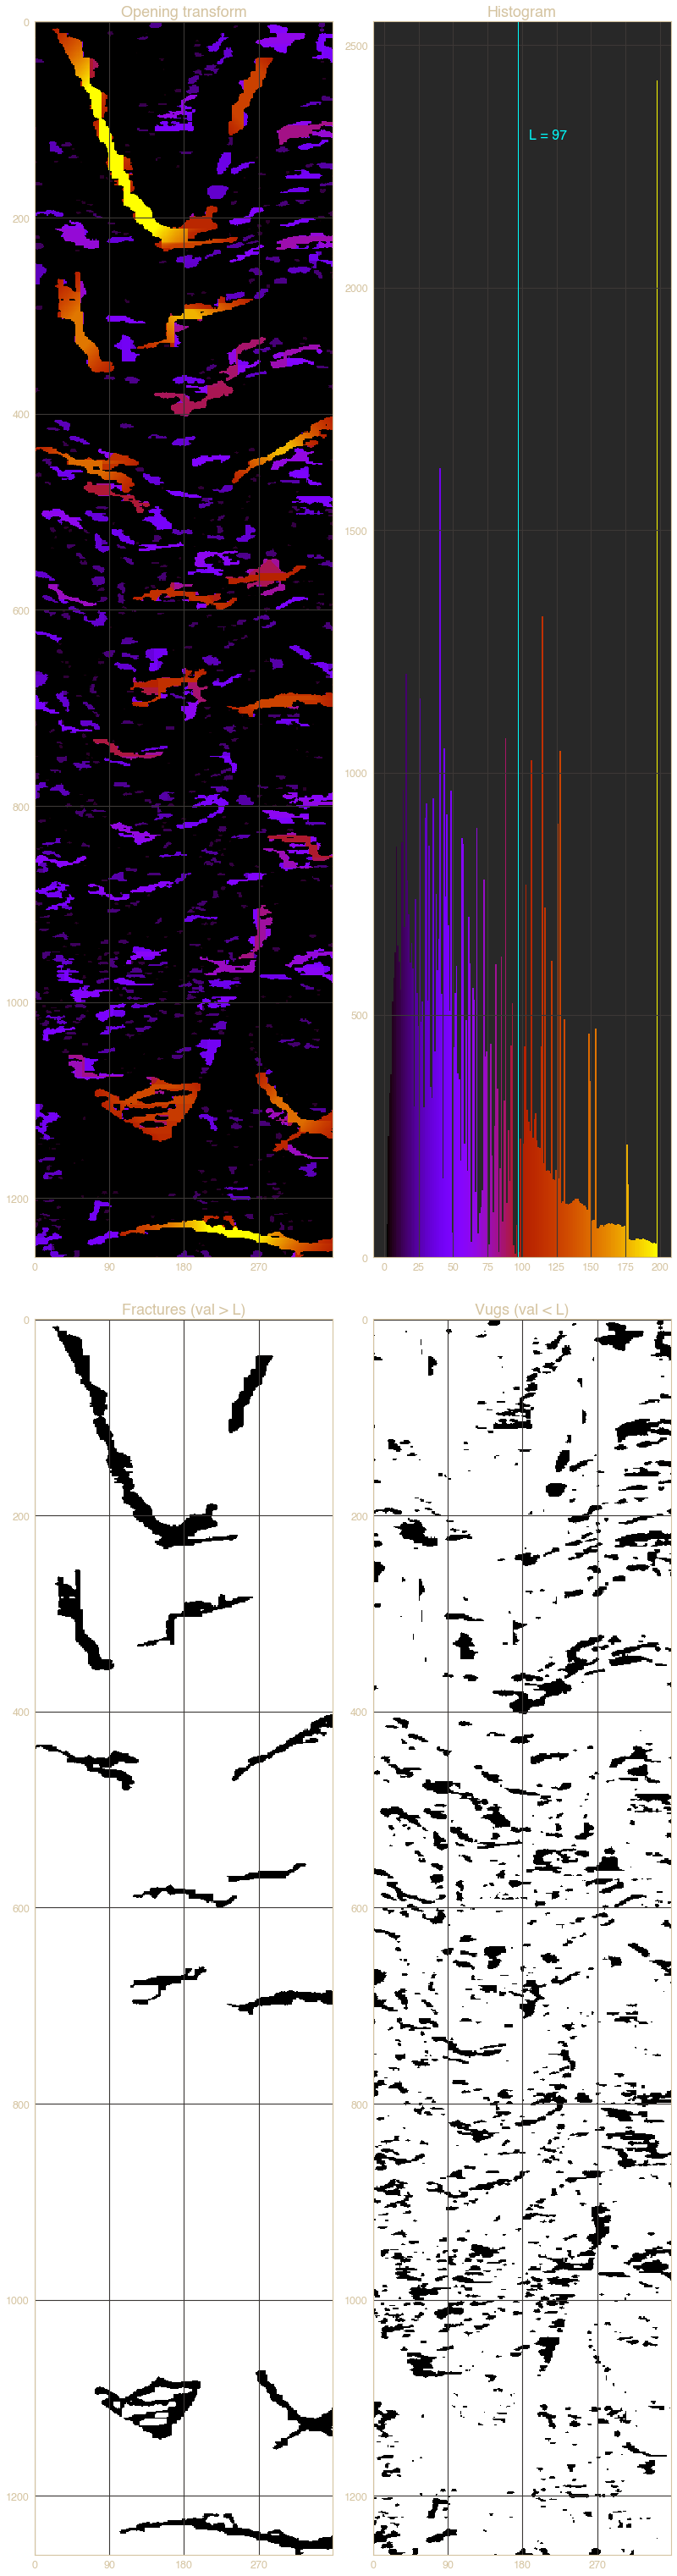

In [27]:
#5. 3 direções
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig17_binary_3_directions.tif")
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1, log=False)

### Fig. 13

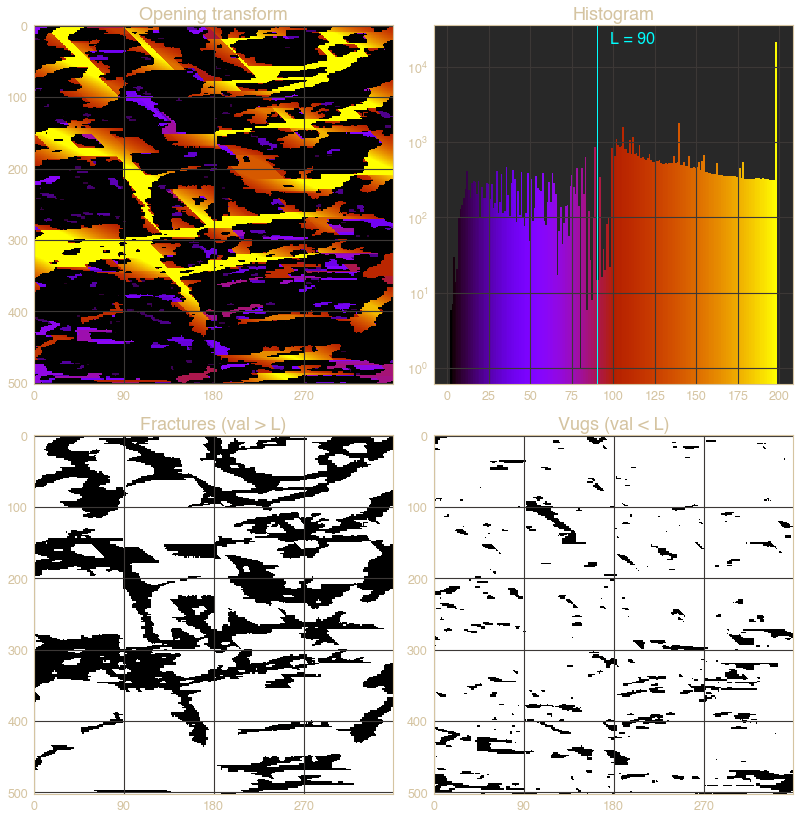

In [28]:
#1. Vertical direita
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig13_binary_frac_r.tif", t = 90)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

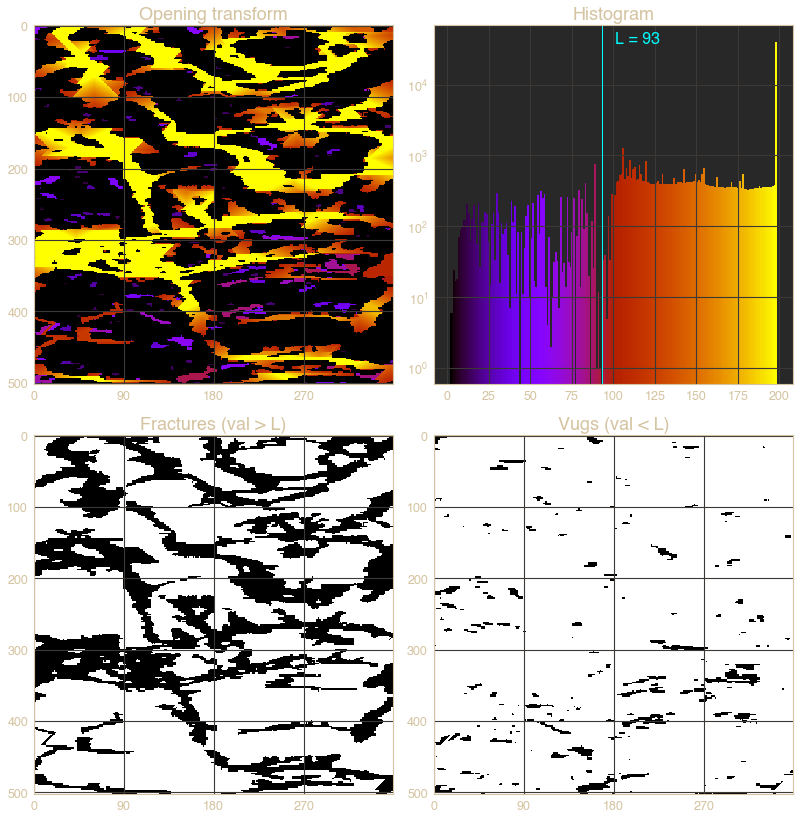

In [29]:
#2. Vertical direita + vertical esquerda
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig13_binary_frac_lr.tif", t = 93)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

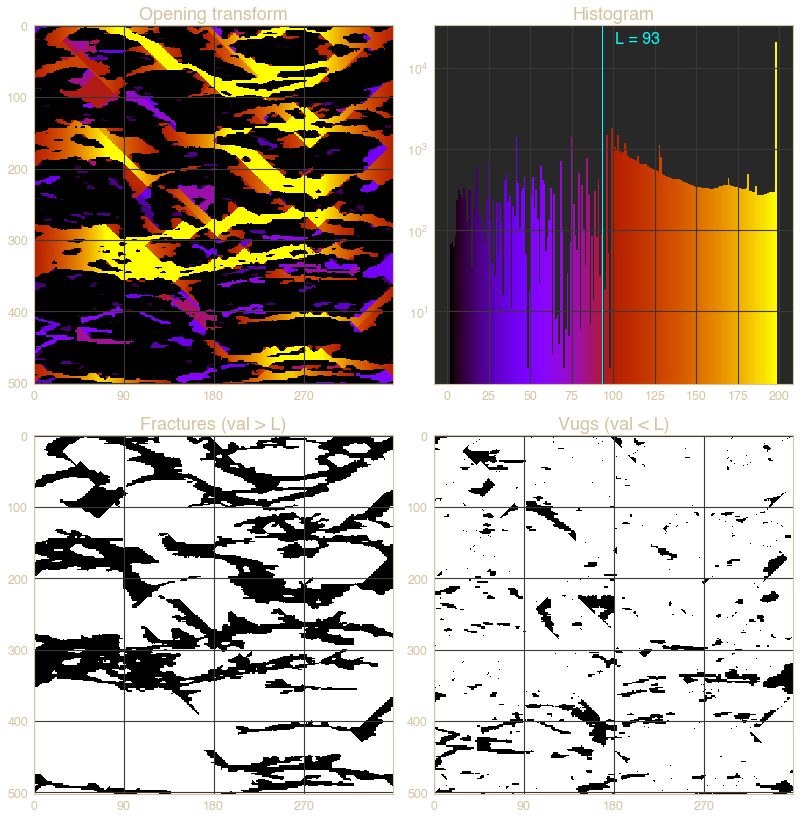

In [30]:
#3. Horizontal
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig13_binary_horiz.tif", t = 93)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

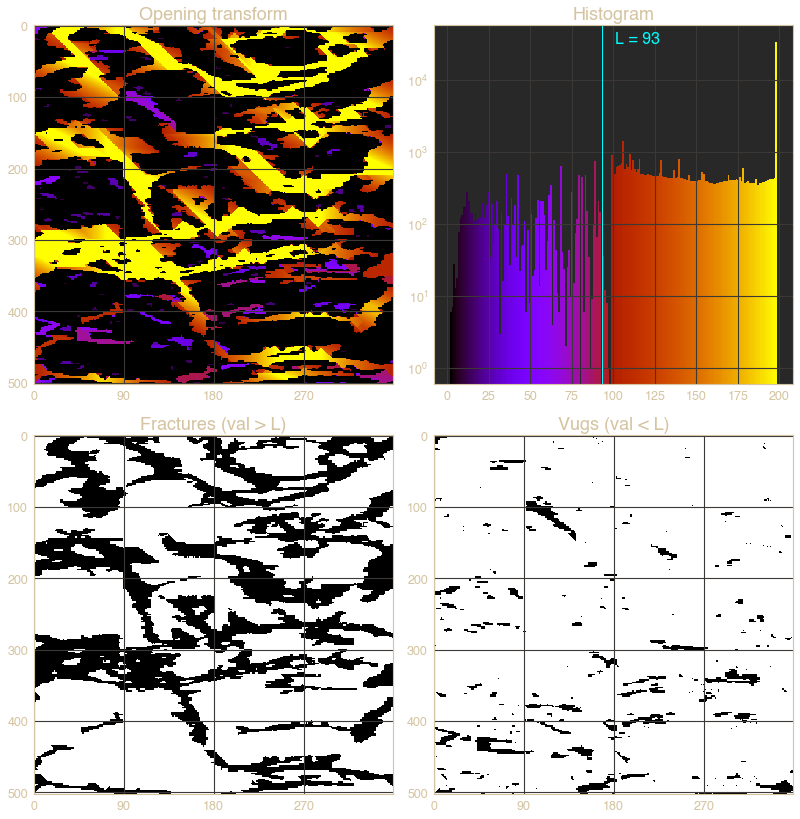

In [31]:
#4. Vertical direita + Horizontal
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig13_binary_frac_r_horiz.tif", t = 93)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

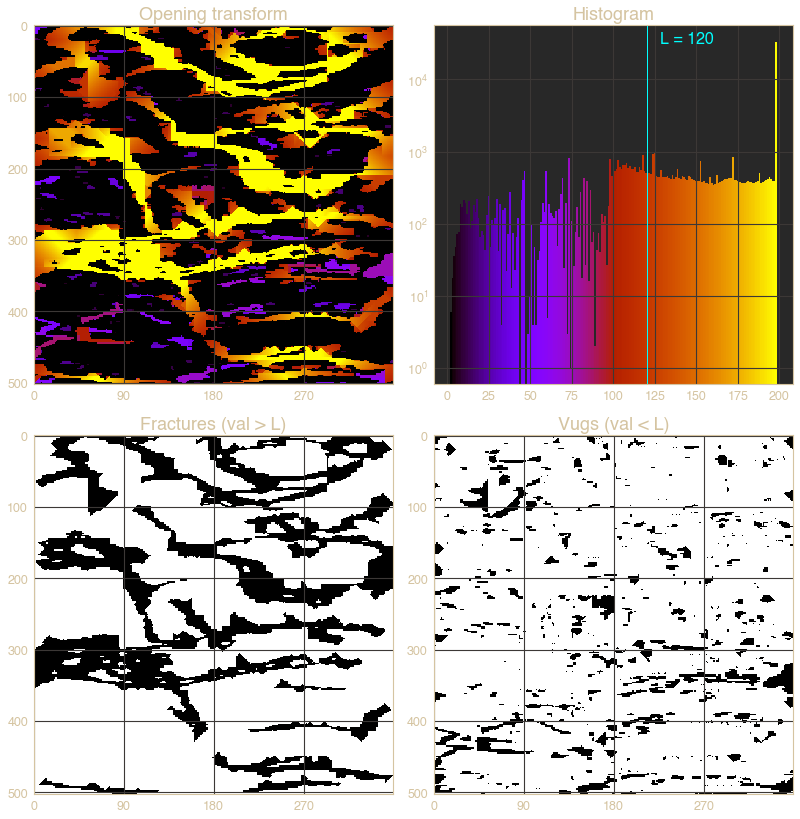

In [32]:
#5. 4 direções
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig13_binary_4_directions.tif", t=120)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)

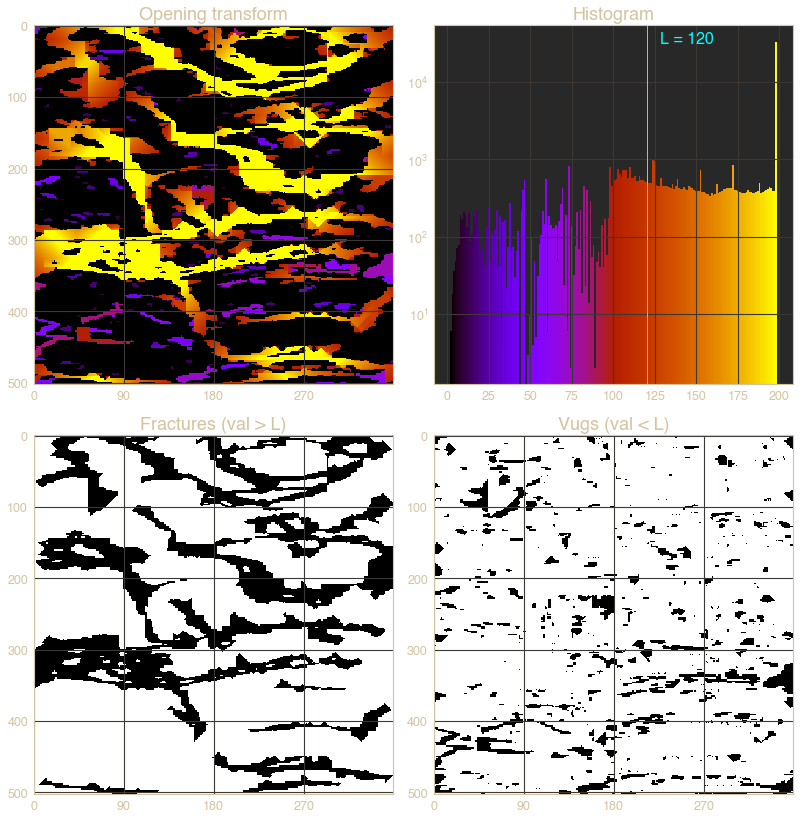

In [33]:
#5. 3 direções (horizontal + diagonais)
op_transf, fracs, vugs, L = get_segmentation_result("./data/opening_transform_fig13_binary_3_directions.tif", t=120)
plot_result(op_transf, fracs, vugs, L, t_color='cyan', filter_background = 1)